### Importing libraries and data

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [37]:
# This option ensures that the graphs created are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [38]:
#path import

path = r'C:\Users\guzic\Contacts\Baseball Analysis'

In [39]:
# dataset import

bb = pd.read_csv(os.path.join(path, '02 Data', 'Prepped Data', 'CLEANED Baseball Hitter.csv'), index_col = False)

### Data Import Checks

In [40]:
bb.head()

,Unnamed: 0,name,url,Year,Age,Team,League,Games,Plate Appearances,At Bats,...,Walk,Batting Average,On Base Percentage,Slugging Percentage,On Base Plus Slugging,Total Bases,Pos,Awards,team_city_code,state_name
0,0,Henry Aaron,/players/a/aaronha01.shtml,1954,20,MLN,NL,122.0,509.0,468.0,...,28.0,0.280,0.322,0.447,0.769,209.0,*79/H,RoY-4,MLN,not a current major league USA team
1,1,Henry Aaron,/players/a/aaronha01.shtml,1955,21,MLN,NL,153.0,665.0,602.0,...,49.0,0.314,0.366,0.540,0.906,325.0,*974/H,"AS,MVP-9",MLN,not a current major league USA team
2,2,Henry Aaron,/players/a/aaronha01.shtml,1956,22,MLN,NL,153.0,660.0,609.0,...,37.0,0.328,0.365,0.558,0.923,340.0,*9/H,"AS,MVP-3",MLN,not a current major league USA team
3,3,Henry Aaron,/players/a/aaronha01.shtml,1957,23,MLN,NL,151.0,675.0,615.0,...,57.0,0.322,0.378,0.600,0.978,369.0,*98/H,"AS,MVP-1",MLN,not a current major league USA team
4,4,Henry Aaron,/players/a/aaronha01.shtml,1958,24,MLN,NL,153.0,664.0,601.0,...,59.0,0.326,0.386,0.546,0.931,328.0,*98,"AS,MVP-3,GG",MLN,not a current major league USA team


In [41]:
# dropping Unnamed: columns

bb = bb.drop(columns = 'Unnamed: 0')

In [42]:
bb.head()

,name,url,Year,Age,Team,League,Games,Plate Appearances,At Bats,Runs,...,Walk,Batting Average,On Base Percentage,Slugging Percentage,On Base Plus Slugging,Total Bases,Pos,Awards,team_city_code,state_name
0,Henry Aaron,/players/a/aaronha01.shtml,1954,20,MLN,NL,122.0,509.0,468.0,58.0,...,28.0,0.280,0.322,0.447,0.769,209.0,*79/H,RoY-4,MLN,not a current major league USA team
1,Henry Aaron,/players/a/aaronha01.shtml,1955,21,MLN,NL,153.0,665.0,602.0,105.0,...,49.0,0.314,0.366,0.540,0.906,325.0,*974/H,"AS,MVP-9",MLN,not a current major league USA team
2,Henry Aaron,/players/a/aaronha01.shtml,1956,22,MLN,NL,153.0,660.0,609.0,106.0,...,37.0,0.328,0.365,0.558,0.923,340.0,*9/H,"AS,MVP-3",MLN,not a current major league USA team
3,Henry Aaron,/players/a/aaronha01.shtml,1957,23,MLN,NL,151.0,675.0,615.0,118.0,...,57.0,0.322,0.378,0.600,0.978,369.0,*98/H,"AS,MVP-1",MLN,not a current major league USA team
4,Henry Aaron,/players/a/aaronha01.shtml,1958,24,MLN,NL,153.0,664.0,601.0,109.0,...,59.0,0.326,0.386,0.546,0.931,328.0,*98,"AS,MVP-3,GG",MLN,not a current major league USA team


In [43]:
bb.columns

Index(['name', 'url', 'Year', 'Age', 'Team', 'League', 'Games',
       'Plate Appearances', 'At Bats', 'Runs', 'Hits', 'Double', 'Triple',
       'Home Run', 'Runs Batted In', 'Walk', 'Batting Average',
       'On Base Percentage', 'Slugging Percentage', 'On Base Plus Slugging',
       'Total Bases', 'Pos', 'Awards', 'team_city_code', 'state_name'],
      dtype='object')

In [44]:
# shape check

bb.shape

(119060, 25)

#### Extreme values checks

In [45]:
# I did do checks previously. I will do this just to check and so I know how to do this

C:\Users\guzic\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Walk', ylabel='Density'>

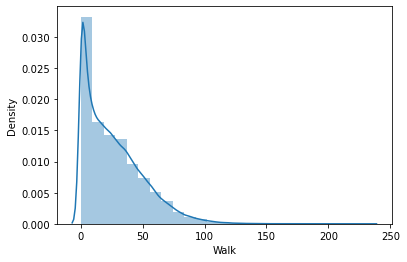

In [46]:
sns.distplot(bb['Walk'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [47]:
bb['Walk'].mean() # Check the mean

26.395556862086345

In [48]:
bb['Walk'].median() # Check the median

21.0

In [49]:
bb['Walk'].max() # Check the max

232.0

### Questions to Explore:

In [50]:
# Does a certain age player yield more home runs? Or RBIs? Or OBP?
# Does a certain team have a history of the most runs? OBP?
# Do Hits, Doubles, or Walks, etc. lead to more runs?
# Does the number of games play lead to more runs? RBIs, etc.?
# Do more plate appearances lead to more runs, etc.?
# Does a certain field positions have better hitting stats?
# Does a higher OBP lead to higher runs? 
# What variable leads to the most number of runs? Having the most runs is how you win games
# How have trends changed over time?

# Most important question - What leads to the most amount of runs?

# RUNS will be y - dependent variable
# walks & runs
# on base percentage & runs
# batting average & runs
# total bases & runs
# hits & runs
# position & runs

# TOTAL BASES will be y - dependent variable
# hits & total bases
# walks & total bases
# batting average & total bases


#### Hypothesis: 

In [254]:
# The higher the walks, the higher amount of runs. 
# Walks have the strongest correlation with runs. 

# A walk does not nescessarly equate to a run.

# Which variable leads to runs - what has strongest correlation?

### Data prep for regression analysis 

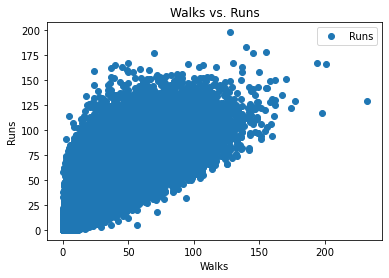

In [52]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

# Walks & Runs

bb.plot(x = 'Walk', y='Runs',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Walks vs. Runs')  
plt.xlabel('Walks')  
plt.ylabel('Runs')  
plt.show()

In [53]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = bb['Walk'].values.reshape(-1,1)
y = bb['Runs'].values.reshape(-1,1)

In [54]:
X

array([[28.],
       [49.],
       [37.],
       ...,
       [46.],
       [67.],
       [ 4.]])

In [55]:
y

array([[ 58.],
       [105.],
       [106.],
       ...,
       [ 91.],
       [ 65.],
       [  4.]])

In [56]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Regression analysis

In [57]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [58]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [59]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

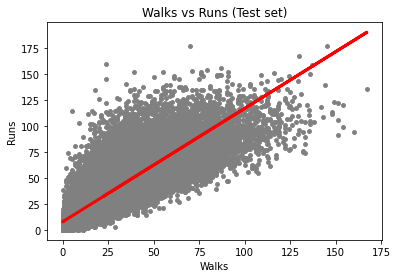

In [60]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Walks vs Runs (Test set)')
plot_test.xlabel('Walks')
plot_test.ylabel('Runs')
plot_test.show()

#### The line seems to fit the data pretty well. There are a lot of values that are higher (the runs)

In [61]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [62]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.09042015]]
Mean squared error:  256.0859457577482
R2 score:  0.7206928063400209


In [63]:
y_predicted

array([[32.84575044],
       [81.91465699],
       [28.48406986],
       ...,
       [63.37751452],
       [15.39902811],
       [ 8.85650724]])

In [64]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,52.0,32.845750
1,88.0,81.914657
2,7.0,28.484070
3,41.0,47.021212
4,65.0,75.372136
5,29.0,60.106254
6,23.0,16.489448
7,28.0,28.484070
8,3.0,13.218188
9,24.0,13.218188


##### Compare how the regression fits the training set

In [65]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [66]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [67]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.09042015]]
Mean squared error:  252.7436865842847
R2 score:  0.7221775338429377


### R2 score:  0.72 - Fairly strong positive

#### The model performed very well on the test set. the R2 scores are almost identical. 
#### When looking at the Actual & Predicted, there seems to be a large difference with some of the values
#### The MSE seems to make sense. Of course there are outstanding yeras where a player may break a record for runs, 

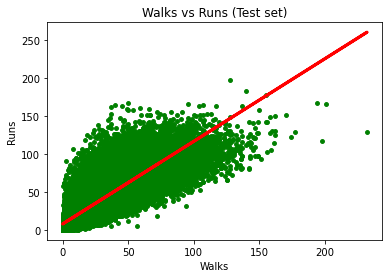

In [68]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Walks vs Runs (Test set)')
plot_test.xlabel('Walks')
plot_test.ylabel('Runs')
plot_test.show()

#### Comparing Plate Appearances & Runs

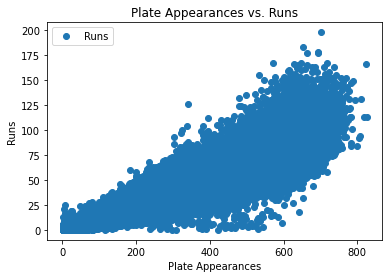

In [70]:
# plate appearances & runs

bb.plot(x = 'Plate Appearances', y='Runs',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Plate Appearances vs. Runs')  
plt.xlabel('Plate Appearances')  
plt.ylabel('Runs')  
plt.show()

In [71]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X2 = bb['Plate Appearances'].values.reshape(-1,1)
y2 = bb['Runs'].values.reshape(-1,1)

In [72]:
X2

array([[509.],
       [665.],
       [660.],
       ...,
       [649.],
       [636.],
       [ 59.]])

In [73]:
y2

array([[ 58.],
       [105.],
       [106.],
       ...,
       [ 91.],
       [ 65.],
       [  4.]])

In [74]:
# Split data into a training set and a test set.

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=0)

### Regression analysis

In [75]:
# Create a regression object.

regression2 = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [76]:
# Fit the regression object onto the training set.

regression2.fit(X2_train, y2_train)

LinearRegression()

In [77]:
# Predict the values of y using X.

y2_predicted = regression2.predict(X2_test)

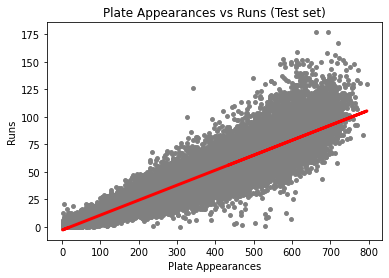

In [78]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X2_test, y2_test, color='gray', s = 15)
plot_test.plot(X2_test, y2_predicted, color='red', linewidth =3)
plot_test.title('Plate Appearances vs Runs (Test set)')
plot_test.xlabel('Plate Appearances')
plot_test.ylabel('Runs')
plot_test.show()

#### The line fits the test set semi-decently. There are a lot of calue that are far away from the red line
#### There are a lot of higher values as plate appearances go up
#### There are a lot of lower values in the 300-600 plate appearances range

In [79]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y2_test, y2_predicted) # This is the mean squared error
r2 = r2_score(y2_test, y2_predicted) # This is the R2 score. 

In [80]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.09042015]]
Mean squared error:  112.06026009362289
R2 score:  0.8777783893022948


In [81]:
y2_predicted

array([[56.53560896],
       [74.78409678],
       [ 9.68874469],
       ...,
       [63.20856346],
       [ 7.78218626],
       [-0.79732668]])

In [82]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y2_test.flatten(), 'Predicted': y2_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,52.0,56.535609
1,88.0,74.784097
2,7.0,9.688745
3,41.0,42.236421
4,65.0,59.803995
5,29.0,38.831852
6,23.0,24.941212
7,28.0,27.664867
8,3.0,1.790145
9,24.0,20.310999


##### Compare how the regression fits the training set

In [83]:
# Predict.

y2_predicted_train = regression2.predict(X2_train) # This is predicting X_train!

In [84]:
rmse = mean_squared_error(y2_train, y2_predicted_train)
r2 = r2_score(y2_train, y2_predicted_train)

In [85]:
print('Slope:' ,regression2.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.13618274]]
Mean squared error:  110.03094064672283
R2 score:  0.8790511142051426


### R2 score:  0.87 - Strong positive correlation

#### The R2 scores of both the training and test set are almost identical.
#### The MSE score makes sense. 
#### The actual and predicted values are very close in a lot of cases.

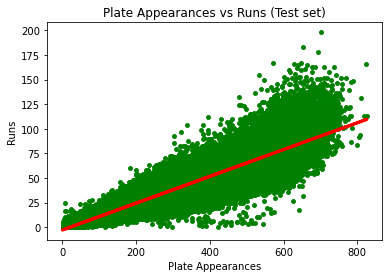

In [259]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X2_train, y2_train, color='green', s = 15)
plot_test.plot(X2_train, y2_predicted_train, color='red', linewidth =3)
plot_test.title('Plate Appearances vs Runs (Test set)')
plot_test.xlabel('Plate Appearances')
plot_test.ylabel('Runs')
plot_test.show()

#### On Base Percentage & Runs

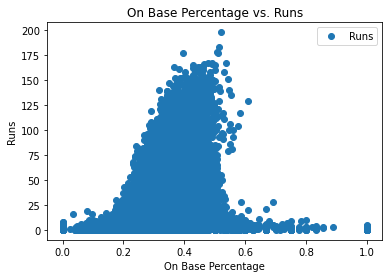

In [87]:
# on base percentage & runs

bb.plot(x = 'On Base Percentage', y='Runs',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('On Base Percentage vs. Runs')  
plt.xlabel('On Base Percentage')  
plt.ylabel('Runs')  
plt.show()

In [88]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X3 = bb['On Base Percentage'].values.reshape(-1,1)
y3 = bb['Runs'].values.reshape(-1,1)

In [89]:
X3

array([[0.322],
       [0.366],
       [0.365],
       ...,
       [0.363],
       [0.366],
       [0.175]])

In [90]:
y3

array([[ 58.],
       [105.],
       [106.],
       ...,
       [ 91.],
       [ 65.],
       [  4.]])

In [91]:
# Split data into a training set and a test set.

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=0)

### Regression analysis

In [92]:
# Create a regression object.

regression3 = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [93]:
# Fit the regression object onto the training set.

regression3.fit(X3_train, y3_train)

LinearRegression()

In [94]:
# Predict the values of y using X. 

y3_predicted = regression3.predict(X3_test) 

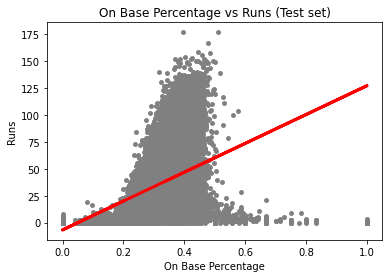

In [95]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X3_test, y3_test, color='gray', s = 15)
plot_test.plot(X3_test, y3_predicted, color='red', linewidth =3)
plot_test.title('On Base Percentage vs Runs (Test set)')
plot_test.xlabel('On Base Percentage')
plot_test.ylabel('Runs')
plot_test.show()

#### The line does not really fit the data. 
#### The data has a bell curve shape

In [96]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y3_test, y3_predicted) # This is the mean squared error
r2 = r2_score(y3_test, y3_predicted) # This is the R2 score. 

In [97]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression3.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[134.12427835]]
Mean squared error:  786.3461505702022
R2 score:  0.1423499016659906


In [91]:
y3_predicted

array([[38.74202728],
       [46.52123542],
       [48.5330996 ],
       ...,
       [37.80315733],
       [44.7776198 ],
       [19.96462831]])

In [92]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y3_test.flatten(), 'Predicted': y3_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,52.0,38.742027
1,88.0,46.521235
2,7.0,48.533100
3,41.0,37.400784
4,65.0,42.363383
5,29.0,40.485643
6,23.0,35.925417
7,28.0,32.706435
8,3.0,25.597848
9,24.0,29.755701


##### Compare how the regression fits the training set

In [98]:
# Predict.

y3_predicted_train = regression3.predict(X3_train) # This is predicting X_train!

In [99]:
rmse = mean_squared_error(y3_train, y3_predicted_train)
r2 = r2_score(y3_train, y3_predicted_train)

In [100]:
print('Slope:' ,regression3.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[134.12427835]]
Mean squared error:  778.5721127392586
R2 score:  0.14417318443995208


### R2 score:  0.14 - Very weak positive correlation

#### The model and test has similar R2 scores.
#### The actual and predicted values were not close at all

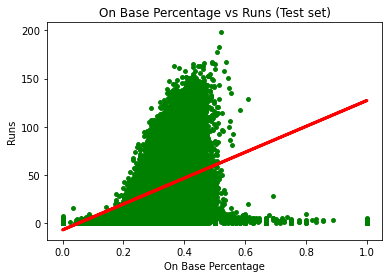

In [101]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X3_train, y3_train, color='green', s = 15)
plot_test.plot(X3_train, y3_predicted_train, color='red', linewidth =3)
plot_test.title('On Base Percentage vs Runs (Test set)')
plot_test.xlabel('On Base Percentage')
plot_test.ylabel('Runs')
plot_test.show()

#### Batting Average & Runs

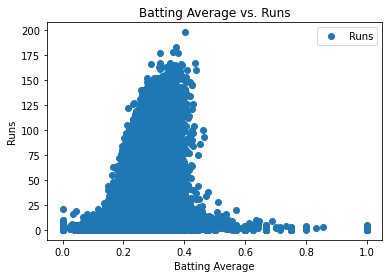

In [102]:
# batting average & runs

bb.plot(x = 'Batting Average', y='Runs',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Batting Average vs. Runs')  
plt.xlabel('Batting Average')  
plt.ylabel('Runs')  
plt.show()

In [103]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X4 = bb['Batting Average'].values.reshape(-1,1)
y4 = bb['Runs'].values.reshape(-1,1)

In [104]:
X4

array([[0.28 ],
       [0.314],
       [0.328],
       ...,
       [0.313],
       [0.286],
       [0.113]])

In [105]:
y4

array([[ 58.],
       [105.],
       [106.],
       ...,
       [ 91.],
       [ 65.],
       [  4.]])

In [106]:
# Split data into a training set and a test set.

X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.3, random_state=0)

### Regression analysis

In [107]:
# Create a regression object.

regression4 = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [108]:
# Fit the regression object onto the training set.

regression4.fit(X4_train, y4_train)

LinearRegression()

In [109]:
# Predict the values of y using X.

y4_predicted = regression4.predict(X4_test)

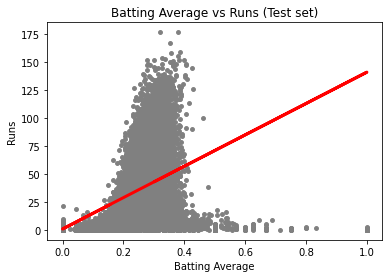

In [119]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X4_test, y4_test, color='gray', s = 15)
plot_test.plot(X4_test, y4_predicted, color='red', linewidth =3)
plot_test.title('Batting Average vs Runs (Test set)')
plot_test.xlabel('Batting Average')
plot_test.ylabel('Runs')
plot_test.show()

#### The line does not really fit the test set
#### The plot has a bell curve shape

In [120]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y4_test, y4_predicted) # This is the mean squared error
r2 = r2_score(y4_test, y4_predicted) # This is the R2 score. 

In [121]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression4.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[140.44062551]]
Mean squared error:  800.4533851531869
R2 score:  0.12696345751726001


In [122]:
y4_predicted

array([[43.52504311],
       [45.49121186],
       [37.48609621],
       ...,
       [35.66036808],
       [44.92944936],
       [22.45894928]])

In [123]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y4_test.flatten(), 'Predicted': y4_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,52.0,43.525043
1,88.0,45.491212
2,7.0,37.486096
3,41.0,35.519927
4,65.0,37.907418
5,29.0,33.132437
6,23.0,40.154468
7,28.0,33.132437
8,3.0,11.223699
9,24.0,35.239046


##### Compare how the regression fits the training set

In [124]:
# Predict.

y4_predicted_train = regression4.predict(X4_train) # This is predicting X_train!

In [125]:
rmse = mean_squared_error(y4_train, y4_predicted_train)
r2 = r2_score(y4_train, y4_predicted_train)

In [126]:
print('Slope:' ,regression4.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[140.44062551]]
Mean squared error:  790.4680437385175
R2 score:  0.1310968661662364


#### R2 score:  0.13 - Very weak positive correlation

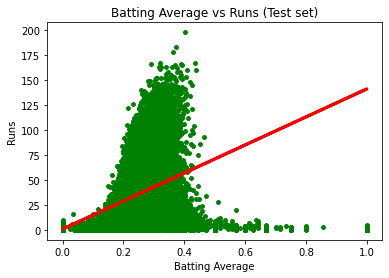

In [127]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X4_train, y4_train, color='green', s = 15)
plot_test.plot(X4_train, y4_predicted_train, color='red', linewidth =3)
plot_test.title('Batting Average vs Runs (Test set)')
plot_test.xlabel('Batting Average')
plot_test.ylabel('Runs')
plot_test.show()

#### Total Bases & Runs

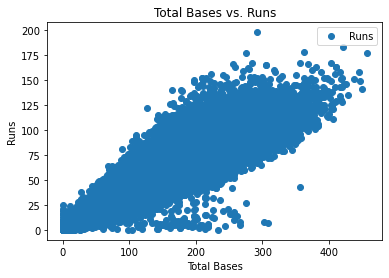

In [258]:
# total bases & runs

bb.plot(x = 'Total Bases', y='Runs',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Total Bases vs. Runs')  
plt.xlabel('Total Bases')  
plt.ylabel('Runs')  
plt.show()

In [129]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X5 = bb['Total Bases'].values.reshape(-1,1)
y5 = bb['Runs'].values.reshape(-1,1)

In [130]:
X5

array([[209.],
       [325.],
       [340.],
       ...,
       [287.],
       [242.],
       [ 10.]])

In [131]:
y5

array([[ 58.],
       [105.],
       [106.],
       ...,
       [ 91.],
       [ 65.],
       [  4.]])

In [132]:
# Split data into a training set and a test set.

X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.3, random_state=0)

### Regression analysis

In [133]:
# Create a regression object.

regression5 = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [134]:
# Fit the regression object onto the training set.

regression5.fit(X5_train, y5_train)

LinearRegression()

In [135]:
# Predict the values of y using X.

y5_predicted = regression5.predict(X5_test)

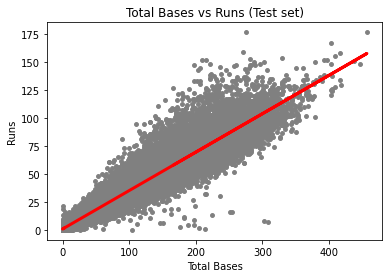

In [136]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X5_test, y5_test, color='gray', s = 15)
plot_test.plot(X5_test, y5_predicted, color='red', linewidth =3)
plot_test.title('Total Bases vs Runs (Test set)')
plot_test.xlabel('Total Bases')
plot_test.ylabel('Runs')
plot_test.show()

#### The line fits the data fairly well. There are some values further away from the line but as runs & total bases
#### both increase, the line fits closer to the data points

In [137]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y5_test, y5_predicted) # This is the mean squared error
r2 = r2_score(y5_test, y5_predicted) # This is the R2 score. 

In [138]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression5.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.3440114]]
Mean squared error:  90.32872644886056
R2 score:  0.9014804853243383


In [139]:
y5_predicted

array([[58.25021593],
       [92.30734465],
       [ 8.02455135],
       ...,
       [68.91456937],
       [10.77664256],
       [ 1.48833473]])

In [140]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y5_test.flatten(), 'Predicted': y5_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,52.0,58.250216
1,88.0,92.307345
2,7.0,8.024551
3,41.0,29.697270
4,65.0,54.122079
5,29.0,34.857441
6,23.0,27.977213
7,28.0,26.945178
8,3.0,2.520369
9,24.0,23.505064


##### Compare how the regression fits the training set

In [141]:
# Predict.

y5_predicted_train = regression5.predict(X5_train) # This is predicting X_train!

In [142]:
rmse = mean_squared_error(y5_train, y5_predicted_train)
r2 = r2_score(y5_train, y5_predicted_train)

In [143]:
print('Slope:' ,regression5.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.3440114]]
Mean squared error:  88.51772449996398
R2 score:  0.9026990036762386


### R2 score:  0.90 - Very strong positive correlation

#### The test seemed to perform well

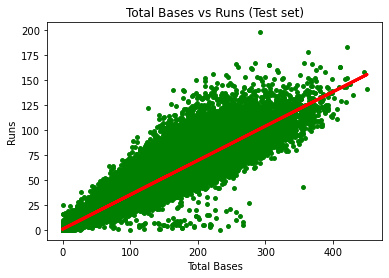

In [144]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X5_train, y5_train, color='green', s = 15)
plot_test.plot(X5_train, y5_predicted_train, color='red', linewidth =3)
plot_test.title('Total Bases vs Runs (Test set)')
plot_test.xlabel('Total Bases')
plot_test.ylabel('Runs')
plot_test.show()

#### Hits & Runs

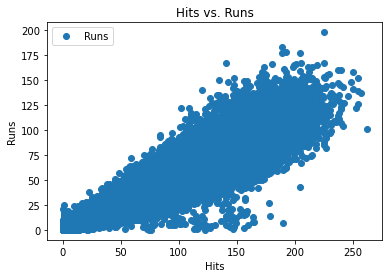

In [145]:
# hits & runs

bb.plot(x = 'Hits', y='Runs',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Hits vs. Runs')  
plt.xlabel('Hits')  
plt.ylabel('Runs')  
plt.show()

In [146]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X6 = bb['Hits'].values.reshape(-1,1)
y6 = bb['Runs'].values.reshape(-1,1)

In [147]:
X6

array([[131.],
       [189.],
       [200.],
       ...,
       [185.],
       [157.],
       [  6.]])

In [148]:
y6

array([[ 58.],
       [105.],
       [106.],
       ...,
       [ 91.],
       [ 65.],
       [  4.]])

In [149]:
# Split data into a training set and a test set.

X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y6, test_size=0.3, random_state=0)

### Regression analysis

In [150]:
# Create a regression object.

regression6 = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [151]:
# Fit the regression object onto the training set.

regression6.fit(X6_train, y6_train)

LinearRegression()

In [152]:
# Predict the values of y using X.

y6_predicted = regression6.predict(X6_test)

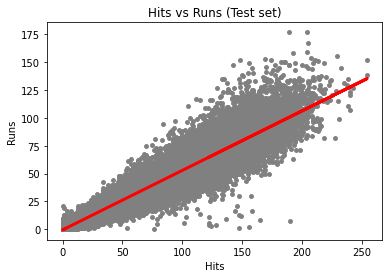

In [153]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X6_test, y6_test, color='gray', s = 15)
plot_test.plot(X6_test, y6_predicted, color='red', linewidth =3)
plot_test.title('Hits vs Runs (Test set)')
plot_test.xlabel('Hits')
plot_test.ylabel('Runs')
plot_test.show()

#### The line seems to fit the data fairly well. There are some values that are far from the line

In [154]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y6_test, y6_predicted) # This is the mean squared error
r2 = r2_score(y6_test, y6_predicted) # This is the R2 score. 

In [155]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression6.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.53496569]]
Mean squared error:  92.56055470364969
R2 score:  0.8990462803361197


In [156]:
y6_predicted

array([[64.66001889],
       [82.84885223],
       [ 9.0235875 ],
       ...,
       [55.56560222],
       [11.16345024],
       [ 0.46413651]])

In [157]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y6_test.flatten(), 'Predicted': y6_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,52.0,64.660019
1,88.0,82.848852
2,7.0,9.023587
3,41.0,37.376769
4,65.0,54.495671
5,29.0,30.957181
6,23.0,28.282352
7,28.0,24.537592
8,3.0,0.464137
9,24.0,20.257867


##### Compare how the regression fits the training set

In [158]:
# Predict.

y6_predicted_train = regression6.predict(X6_train) # This is predicting X_train!

In [159]:
rmse = mean_squared_error(y6_train, y6_predicted_train)
r2 = r2_score(y6_train, y6_predicted_train)

In [160]:
print('Slope:' ,regression6.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.53496569]]
Mean squared error:  90.70908394359276
R2 score:  0.9002902041010907


### R2 score:  0.90 - Strong positive correlation
#### The test seems to peform pretty well

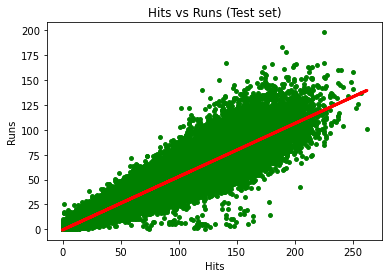

In [161]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X6_train, y6_train, color='green', s = 15)
plot_test.plot(X6_train, y6_predicted_train, color='red', linewidth =3)
plot_test.title('Hits vs Runs (Test set)')
plot_test.xlabel('Hits')
plot_test.ylabel('Runs')
plot_test.show()

#### Double & Runs

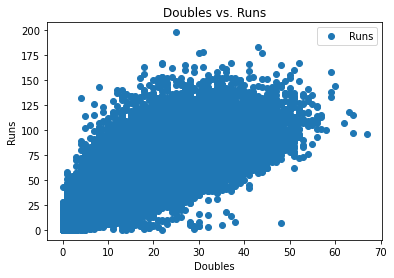

In [163]:
# doubles & runs

bb.plot(x = 'Double', y='Runs',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Doubles vs. Runs')  
plt.xlabel('Doubles')  
plt.ylabel('Runs')  
plt.show()

In [164]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X7 = bb['Double'].values.reshape(-1,1)
y7 = bb['Runs'].values.reshape(-1,1)

In [165]:
X7

array([[27.],
       [37.],
       [34.],
       ...,
       [38.],
       [32.],
       [ 1.]])

In [166]:
y7

array([[ 58.],
       [105.],
       [106.],
       ...,
       [ 91.],
       [ 65.],
       [  4.]])

In [167]:
# Split data into a training set and a test set.

X7_train, X7_test, y7_train, y7_test = train_test_split(X7, y7, test_size=0.3, random_state=0)

### Regression analysis

In [168]:
# Create a regression object.

regression7 = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [169]:
# Fit the regression object onto the training set.

regression7.fit(X7_train, y7_train)

LinearRegression()

In [170]:
# Predict the values of y using X.

y7_predicted = regression7.predict(X7_test)

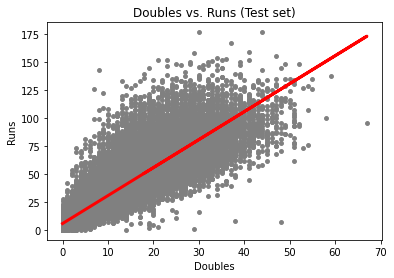

In [171]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X7_test, y7_test, color='gray', s = 15)
plot_test.plot(X7_test, y7_predicted, color='red', linewidth =3)
plot_test.title('Doubles vs. Runs (Test set)')
plot_test.xlabel('Doubles')
plot_test.ylabel('Runs')
plot_test.show()

### The data does seem to have a positive slope, however, there is a large range of values 

In [172]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y7_test, y7_predicted) # This is the mean squared error
r2 = r2_score(y7_test, y7_predicted) # This is the R2 score. 

In [173]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression7.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[2.50409465]]
Mean squared error:  221.23967173177292
R2 score:  0.7586988553596294


In [174]:
y7_predicted

array([[50.77968596],
       [70.81244319],
       [13.21826616],
       ...,
       [55.78787527],
       [15.72236081],
       [ 5.7059822 ]])

In [175]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y7_test.flatten(), 'Predicted': y7_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,52.0,50.779686
1,88.0,70.812443
2,7.0,13.218266
3,41.0,28.242834
4,65.0,30.746929
5,29.0,23.234645
6,23.0,40.763307
7,28.0,25.738739
8,3.0,5.705982
9,24.0,30.746929


##### Compare how the regression fits the training set

In [176]:
# Predict.

y7_predicted_train = regression7.predict(X7_train) # This is predicting X_train!

In [177]:
rmse = mean_squared_error(y7_train, y7_predicted_train)
r2 = r2_score(y7_train, y7_predicted_train)

In [178]:
print('Slope:' ,regression7.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[2.50409465]]
Mean squared error:  218.03624813438893
R2 score:  0.7603288573219078


### R2 score:  0.76 - Fairly positive correlation. Not the highest R2 score though
#### A lot of the actual and predicted values are similar

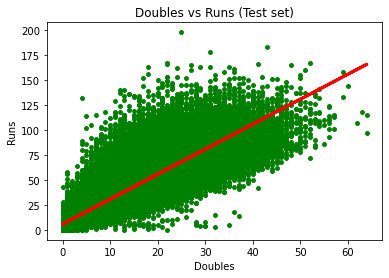

In [199]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X7_train, y7_train, color='green', s = 15)
plot_test.plot(X7_train, y7_predicted_train, color='red', linewidth =3)
plot_test.title('Doubles vs Runs (Test set)')
plot_test.xlabel('Doubles')
plot_test.ylabel('Runs')
plot_test.show()

#### Triple & Runs

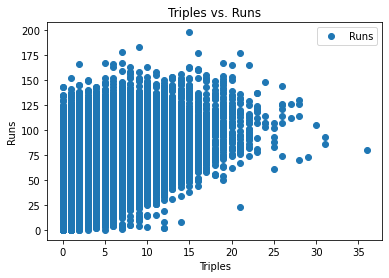

In [181]:
# triples & runs

bb.plot(x = 'Triple', y='Runs',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Triples vs. Runs')  
plt.xlabel('Triples')  
plt.ylabel('Runs')  
plt.show()

In [183]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X8 = bb['Triple'].values.reshape(-1,1)
y8 = bb['Runs'].values.reshape(-1,1)

In [184]:
X8

array([[ 6.],
       [ 9.],
       [14.],
       ...,
       [ 8.],
       [ 7.],
       [ 0.]])

In [185]:
y8

array([[ 58.],
       [105.],
       [106.],
       ...,
       [ 91.],
       [ 65.],
       [  4.]])

In [186]:
# Split data into a training set and a test set.

X8_train, X8_test, y8_train, y8_test = train_test_split(X8, y8, test_size=0.3, random_state=0)

### Regression analysis

In [187]:
# Create a regression object.

regression8 = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [188]:
# Fit the regression object onto the training set.

regression8.fit(X8_train, y8_train)

LinearRegression()

In [189]:
# Predict the values of y using X.

y8_predicted = regression8.predict(X8_test)

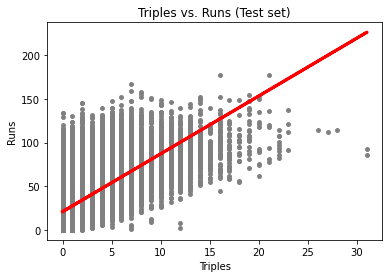

In [190]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X8_test, y8_test, color='gray', s = 15)
plot_test.plot(X8_test, y8_predicted, color='red', linewidth =3)
plot_test.title('Triples vs. Runs (Test set)')
plot_test.xlabel('Triples')
plot_test.ylabel('Runs')
plot_test.show()

#### The line fits the data fairly well.

In [191]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y8_test, y8_predicted) # This is the mean squared error
r2 = r2_score(y8_test, y8_predicted) # This is the R2 score. 

In [192]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression8.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[6.62496782]]
Mean squared error:  511.9851505851878
R2 score:  0.44158928682167276


In [193]:
y8_predicted

array([[40.77758806],
       [40.77758806],
       [20.90268461],
       ...,
       [54.0275237 ],
       [20.90268461],
       [20.90268461]])

In [195]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y8_test.flatten(), 'Predicted': y8_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,52.0,40.777588
1,88.0,40.777588
2,7.0,20.902685
3,41.0,34.152620
4,65.0,40.777588
5,29.0,20.902685
6,23.0,27.527652
7,28.0,20.902685
8,3.0,20.902685
9,24.0,47.402556


##### Compare how the regression fits the training set

In [196]:
# Predict.

y8_predicted_train = regression8.predict(X8_train) # This is predicting X_train!

In [197]:
rmse = mean_squared_error(y8_train, y8_predicted_train)
r2 = r2_score(y8_train, y8_predicted_train)

In [198]:
print('Slope:' ,regression8.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[6.62496782]]
Mean squared error:  508.69480951208686
R2 score:  0.4408293698255624


### R2 score:  0.44 - Weak positive correlation
#### The test did not perform too well. The actual and predicted values are quite different

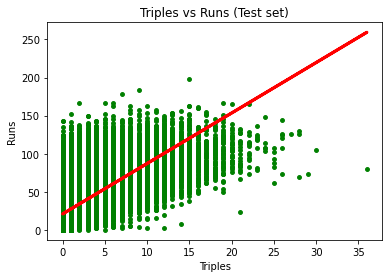

In [201]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X8_train, y8_train, color='green', s = 15)
plot_test.plot(X8_train, y8_predicted_train, color='red', linewidth =3)
plot_test.title('Triples vs Runs (Test set)')
plot_test.xlabel('Triples')
plot_test.ylabel('Runs')
plot_test.show()

#### Runs Batted In & Runs

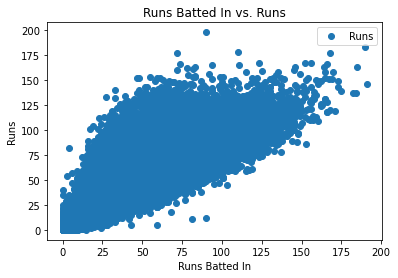

In [202]:
# runs batted in & runs

bb.plot(x = 'Runs Batted In', y='Runs',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Runs Batted In vs. Runs')  
plt.xlabel('Runs Batted In')  
plt.ylabel('Runs')  
plt.show()

In [203]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X9 = bb['Runs Batted In'].values.reshape(-1,1)
y9 = bb['Runs'].values.reshape(-1,1)

In [204]:
X9

array([[ 69.],
       [106.],
       [ 92.],
       ...,
       [ 95.],
       [ 94.],
       [  8.]])

In [205]:
y9

array([[ 58.],
       [105.],
       [106.],
       ...,
       [ 91.],
       [ 65.],
       [  4.]])

In [206]:
# Split data into a training set and a test set.

X9_train, X9_test, y9_train, y9_test = train_test_split(X9, y9, test_size=0.3, random_state=0)

### Regression analysis

In [208]:
# Create a regression object.

regression9 = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [209]:
# Fit the regression object onto the training set.

regression9.fit(X9_train, y9_train)

LinearRegression()

In [210]:
# Predict the values of y using X.

y9_predicted = regression9.predict(X9_test)

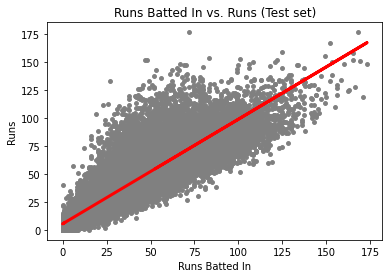

In [211]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X9_test, y9_test, color='gray', s = 15)
plot_test.plot(X9_test, y9_predicted, color='red', linewidth =3)
plot_test.title('Runs Batted In vs. Runs (Test set)')
plot_test.xlabel('Runs Batted In')
plot_test.ylabel('Runs')
plot_test.show()

#### The line fits the data fairly well. There are a lot of higher run values further from the red line

In [212]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y9_test, y9_predicted) # This is the mean squared error
r2 = r2_score(y9_test, y9_predicted) # This is the R2 score. 

In [213]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression9.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.93773747]]
Mean squared error:  191.4522949922049
R2 score:  0.7911872786465975


In [214]:
y9_predicted

array([[ 55.08879527],
       [103.85114346],
       [ 20.39250905],
       ...,
       [ 74.78128204],
       [ 17.57929665],
       [  6.32644707]])

In [215]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y9_test.flatten(), 'Predicted': y9_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,52.0,55.088795
1,88.0,103.851143
2,7.0,20.392509
3,41.0,26.956671
4,65.0,51.337845
5,29.0,31.645359
6,23.0,23.205721
7,28.0,29.769884
8,3.0,6.326447
9,24.0,24.143459


##### Compare how the regression fits the training set

In [216]:
# Predict.

y9_predicted_train = regression9.predict(X9_train) # This is predicting X_train!

In [217]:
rmse = mean_squared_error(y9_train, y9_predicted_train)
r2 = r2_score(y9_train, y9_predicted_train)

In [218]:
print('Slope:' ,regression9.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.93773747]]
Mean squared error:  190.3467936196548
R2 score:  0.7907658294330266


### R2 score:  0.79 - Fairly strong positive correlation
#### This makes sense as runs batted in will also count as a run. I would have thought a stronger R2 score.
#### The test performed fairly well

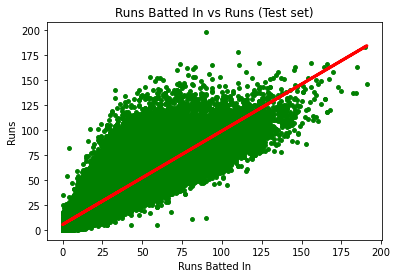

In [219]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X9_train, y9_train, color='green', s = 15)
plot_test.plot(X9_train, y9_predicted_train, color='red', linewidth =3)
plot_test.title('Runs Batted In vs Runs (Test set)')
plot_test.xlabel('Runs Batted In')
plot_test.ylabel('Runs')
plot_test.show()

#### Exploring other variables

#### Walks and Runs Batted In

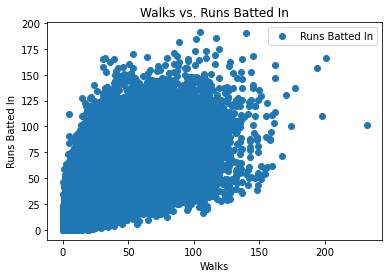

In [220]:
# Walks and Runs Batted In

bb.plot(x = 'Walk', y='Runs Batted In',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Walks vs. Runs Batted In')  
plt.xlabel('Walks')  
plt.ylabel('Runs Batted In')  
plt.show()

In [221]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X10 = bb['Walk'].values.reshape(-1,1)
y10 = bb['Runs Batted In'].values.reshape(-1,1)

In [222]:
X10

array([[28.],
       [49.],
       [37.],
       ...,
       [46.],
       [67.],
       [ 4.]])

In [223]:
y10

array([[ 69.],
       [106.],
       [ 92.],
       ...,
       [ 95.],
       [ 94.],
       [  8.]])

In [224]:
# Split data into a training set and a test set.

X10_train, X10_test, y10_train, y10_test = train_test_split(X10, y10, test_size=0.3, random_state=0)

### Regression analysis

In [225]:
# Create a regression object.

regression10 = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [226]:
# Fit the regression object onto the training set.

regression10.fit(X10_train, y10_train)

LinearRegression()

In [227]:
# Predict the values of y using X.

y10_predicted = regression10.predict(X10_test)

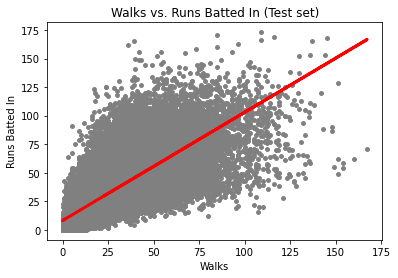

In [228]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X10_test, y10_test, color='gray', s = 15)
plot_test.plot(X10_test, y10_predicted, color='red', linewidth =3)
plot_test.title('Walks vs. Runs Batted In (Test set)')
plot_test.xlabel('Walks')
plot_test.ylabel('Runs Batted In')
plot_test.show()

### The line does fit as it has a positive slope, howeever, there is a large range of values

In [229]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y10_test, y10_predicted) # This is the mean squared error
r2 = r2_score(y10_test, y10_predicted) # This is the R2 score. 

In [230]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression10.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.94849357]]
Mean squared error:  329.21849477233667
R2 score:  0.6022926222447894


In [231]:
y10_predicted

array([[29.98672739],
       [72.66893796],
       [26.19275312],
       ...,
       [56.5445473 ],
       [14.8108303 ],
       [ 9.11986889]])

In [232]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y10_test.flatten(), 'Predicted': y10_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,53.0,29.986727
1,105.0,72.668938
2,16.0,26.192753
3,23.0,42.317144
4,49.0,66.977977
5,28.0,53.699067
6,19.0,15.759324
7,26.0,26.192753
8,1.0,12.913843
9,20.0,12.913843


##### Compare how the regression fits the training set

In [233]:
# Predict.

y10_predicted_train = regression10.predict(X10_train) # This is predicting X_train!

In [234]:
rmse = mean_squared_error(y10_train, y10_predicted_train)
r2 = r2_score(y10_train, y10_predicted_train)

In [235]:
print('Slope:' ,regression10.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.94849357]]
Mean squared error:  320.99140464157165
R2 score:  0.607630636071502


### R2 score:  0.60 - Fairly strong positive correlation
#### The actual and predicted values are very different.
#### The test did not perform very well

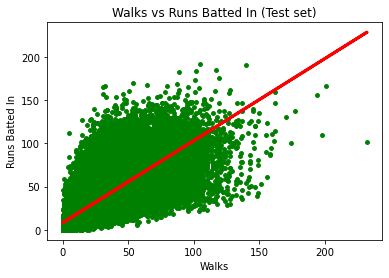

In [236]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X10_train, y10_train, color='green', s = 15)
plot_test.plot(X10_train, y10_predicted_train, color='red', linewidth =3)
plot_test.title('Walks vs Runs Batted In (Test set)')
plot_test.xlabel('Walks')
plot_test.ylabel('Runs Batted In')
plot_test.show()

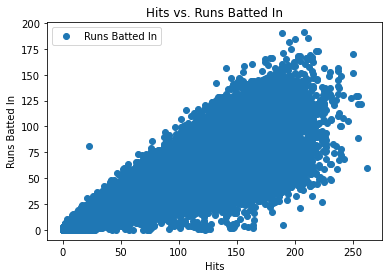

In [237]:
# Hits and Runs Batted In

bb.plot(x = 'Hits', y='Runs Batted In',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Hits vs. Runs Batted In')  
plt.xlabel('Hits')  
plt.ylabel('Runs Batted In')  
plt.show()

In [238]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X11 = bb['Hits'].values.reshape(-1,1)
y11 = bb['Runs Batted In'].values.reshape(-1,1)

In [239]:
X11

array([[131.],
       [189.],
       [200.],
       ...,
       [185.],
       [157.],
       [  6.]])

In [240]:
y11

array([[ 69.],
       [106.],
       [ 92.],
       ...,
       [ 95.],
       [ 94.],
       [  8.]])

In [241]:
# Split data into a training set and a test set.

X11_train, X11_test, y11_train, y11_test = train_test_split(X11, y11, test_size=0.3, random_state=0)

### Regression analysis

In [242]:
# Create a regression object.

regression11 = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [243]:
# Fit the regression object onto the training set.

regression11.fit(X11_train, y11_train)

LinearRegression()

In [244]:
# Predict the values of y using X.

y11_predicted = regression11.predict(X11_test)

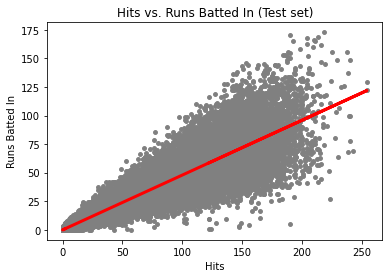

In [245]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X11_test, y11_test, color='gray', s = 15)
plot_test.plot(X11_test, y11_predicted, color='red', linewidth =3)
plot_test.title('Hits vs. Runs Batted In (Test set)')
plot_test.xlabel('Hits')
plot_test.ylabel('Runs Batted In')
plot_test.show()

#### The line fits the data very well

In [246]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y11_test, y11_predicted) # This is the mean squared error
r2 = r2_score(y11_test, y11_predicted) # This is the R2 score. 

In [247]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression11.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.48080244]]
Mean squared error:  156.551774336528
R2 score:  0.810880018458982


In [248]:
y11_predicted

array([[58.47598206],
       [74.82326512],
       [ 8.472528  ],
       ...,
       [50.30234053],
       [10.39573778],
       [ 0.77968892]])

In [249]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y11_test.flatten(), 'Predicted': y11_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,53.0,58.475982
1,105.0,74.823265
2,16.0,8.472528
3,23.0,33.955057
4,49.0,49.340736
5,28.0,28.185428
6,19.0,25.781416
7,26.0,22.415799
8,1.0,0.779689
9,20.0,18.569379


##### Compare how the regression fits the training set

In [250]:
# Predict.

y11_predicted_train = regression11.predict(X11_train) # This is predicting X_train!

In [251]:
rmse = mean_squared_error(y11_train, y11_predicted_train)
r2 = r2_score(y11_train, y11_predicted_train)

In [252]:
print('Slope:' ,regression11.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.48080244]]
Mean squared error:  156.51302289455464
R2 score:  0.8086836147272041


### R2 score:  0.80 - Fairly strong positive correlation
#### The test performed pretty well

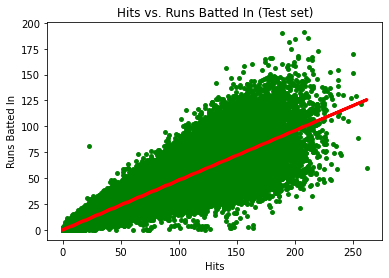

In [253]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X11_train, y11_train, color='green', s = 15)
plot_test.plot(X11_train, y11_predicted_train, color='red', linewidth =3)
plot_test.title('Hits vs. Runs Batted In (Test set)')
plot_test.xlabel('Hits')
plot_test.ylabel('Runs Batted In')
plot_test.show()

In [256]:
## Data Bias overall: A lot of these variables are directly related and all seem to have a positive correlation.
## Having more columns with different variables may have shown more insights, however, there was too much missing data.
## Looking for whatever variable has the strongest correlation with runs may be the best predictor of the most games
## won. I wish we had data on if the game was won. 
## One other thing - Players do have outstanding and record breaking years so there may be higher values in some cases, 
## however, I do not think it would ever be too much of a different that it would be an outlier, extreme value, etc. 

### Variables and their R2 Scores: 

#### Walks & Runs
### R2 score:  0.72 - Fairly strong positive

#### Plate Appearances & Runs
### R2 score:  0.87 - Strong positive correlation

#### On Base Percentage & Runs
### R2 score:  0.14 - Very weak positive correlation

#### Batting Average & Runs
### R2 score:  0.13 - Very weak positive correlation

#### Total Bases & Runs
### R2 score:  0.90 - Very strong positive correlation

#### Hits & Runs
### R2 score:  0.90 - Strong positive correlation

#### Doubles & Runs
### R2 score:  0.76 - Fairly positive correlation. Not the highest R2 score though

#### Triples & Runs
### R2 score:  0.44 - Weak positive correlation

#### Runs Batted In & Runs
### R2 score:  0.79 - Fairly strong positive correlation

#### Walks & Runs Batted In
### R2 score:  0.60 - Fairly strong positive correlation

#### Hits & Runs Batted In
### R2 score:  0.80 - Fairly strong positive correlation
